## Projeto 2


### Como microdados que descrevem um magistrado, a exemplo de seu cargo, região e lotação, afetam seu rendimento líquido no final mensal


---------

#### Lendo a base de dados


In [70]:
import pandas as pd
from  IPython.display import display
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import os
import re

In [93]:
print('Esperamos trabalhar no diretório')

print(os.getcwd())

df = pd.read_csv("DF/contracheque.csv")

Esperamos trabalhar no diretório
c:\Users\thiag\OneDrive\Documentos\Insper\2023.2\CDados\Projeto2\CDadosP2\CDadosP2


---
### Glossário das Colunas

#### Com o melhor entendimento do leitor em mente, segue a explicação resumida do que cada coluna mais intrincada do dataframe implica:



Variável | Descrição
:---:|---:
cargo | função que o invidíduo exerce no poder judiciário
lotação | jurisdição do magistrado dentro de seu cargo.
subsidio | remuneração mensal fixa dos magistrados e autoridades do setor público
direitos_pessoais | benefícios conseguidos pelo governo, auxílios
indenizações | valor pago ao magistrado para ressarcimento de despesas do serviço
direitos_eventuais | pagamentos incomuns que náo fazem parte da remuneração usual, como férias não aproveitadas
TOTAL DE RENDIMENTOS | montante total recebido pelo indivíduo
previdência pública | valor descontado do salário para cobrir aposentadoria futura
imposto de renda | desconto sobre rendimento mensal
descontos diversos | outros descontos no geral
retenção por teto constitucional | refere-se ao limite máximo de salário ditado pela constituição
RENDIMENTO LÍQUIDO | Montante recebido após feitos todos os descontos
remuneração do órgão de origem | valor bruto da remuneração do funcionário, antes de quaisquer descontos ou benefícios.
diárias | valor recebido para cobrir despesas diversas de viagens e trabalho
Tribunal e Órgão | Instituição à qual o indivíduo empresta seus serviços, seja esta um tribunal ou órgão



In [72]:
# Já de início, veremos se uma mesma pessoa pode aparecer mais de uma vez no dataframe


Celina = df.loc[df['nome'] == 'CELINA DIETRICH E TRIGUEIROS TEIXEIRA PINTO']

print (len(Celina))
Celina.describe()


11


,cpf,subsidio,direitos_pessoais,indenizacoes,direitos_eventuais,total_de_rendimentos,previdencia_publica,imposto_de_renda,descontos_diversos,retencao_por_teto_constitucional,total_de_descontos,rendimento_liquido,remuneracao_do_orgao_de_origem,diarias
count,0.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.0
mean,NaN,13157.977273,828.075455,2361.695455,14508.482727,30856.230909,1592.115455,3620.263636,1344.433636,0.0,6556.812727,24299.418182,0.0,0.0
std,NaN,15117.364949,2746.415581,2715.313454,14537.422356,30856.524948,1883.816718,3973.252549,4384.554160,0.0,9361.506821,23649.743432,0.0,0.0
min,NaN,0.000000,0.000000,0.000000,-154.390000,-154.390000,0.000000,0.000000,0.000000,0.0,0.000000,-154.390000,0.0,0.0
25%,NaN,0.000000,0.000000,0.000000,4477.220000,4554.415000,0.000000,388.610000,0.000000,0.0,388.610000,4183.170000,0.0,0.0
50%,NaN,0.000000,0.000000,0.000000,4631.610000,9108.830000,0.000000,1635.570000,0.000000,0.0,1635.570000,7473.260000,0.0,0.0
75%,NaN,28947.550000,0.000000,5232.730000,24639.300000,58884.580000,3184.230000,6111.270000,45.000000,0.0,9340.500000,46927.315000,0.0,0.0
max,NaN,28947.550000,9108.830000,5297.730000,42007.930000,75873.210000,4776.350000,12222.540000,14563.770000,0.0,31562.660000,57063.360000,0.0,0.0


#### Como vemos acima, um mesmo magistrado aparece diversas vezes no dataframe. Deve-se isso ao tamanho da amostra, mas esse fato não só não é um problema como nos beneficia.

#### Visto que o dataframe foi atualizado em meses diferentes, cada discrepância individual significa muito menos no todo. Além disso, os dados também revelam salários por posições diversas na magistratura para a mesma pessoa e área, o que nos ajudará a diferenciar a remuneração de cada cargo

## Visualizando a base de dados:

In [73]:
df = df.drop(columns=['cpf']) #Retirando a coluna CPF, pois alguns valores eram NaN e também irrelevantes.

df = df.drop(columns=['url']) #Retirando a coliuna URL, também pela irrelevância ao Projeto.

df.tail(2)

,nome,cargo,lotacao,subsidio,direitos_pessoais,indenizacoes,direitos_eventuais,total_de_rendimentos,previdencia_publica,imposto_de_renda,descontos_diversos,retencao_por_teto_constitucional,total_de_descontos,rendimento_liquido,remuneracao_do_orgao_de_origem,diarias,tribunal,orgao,data_de_publicacao,mesano_de_referencia
161765,Octavio Augusto Simon de Souza,Juiz Civil de 2º Grau,Aposentado,30471.11,0.0,0.0,0.0,30471.11,3491.57,6497.87,0.0,0.0,9989.44,20481.67,0.0,0.0,Tribunal de Justiça Militar do Estado do Rio G...,Tribunal de Justiça Militar do Rio Grande do Sul,2017-12-06,2017-11-01
161766,Romeu Martinelli,Juiz Civil de 2º Grau,Aposentado,30471.11,0.0,0.0,85987.9,116459.01,5494.49,5974.28,0.0,0.0,11468.77,104990.24,0.0,0.0,Tribunal de Justiça Militar do Estado do Rio G...,Tribunal de Justiça Militar do Rio Grande do Sul,2017-12-06,2017-11-01


In [74]:
# conhecendo os tipos da nossa base de dados

df.dtypes

nome                                 object
cargo                                object
lotacao                              object
subsidio                            float64
direitos_pessoais                   float64
indenizacoes                        float64
direitos_eventuais                  float64
total_de_rendimentos                float64
previdencia_publica                 float64
imposto_de_renda                    float64
descontos_diversos                  float64
retencao_por_teto_constitucional    float64
total_de_descontos                  float64
rendimento_liquido                  float64
remuneracao_do_orgao_de_origem      float64
diarias                             float64
tribunal                             object
orgao                                object
data_de_publicacao                   object
mesano_de_referencia                 object
dtype: object

In [75]:
df.total_de_rendimentos.describe()

count    1.603380e+05
mean     4.093185e+04
std      3.304963e+04
min     -3.454195e+04
25%      3.047110e+04
50%      3.819228e+04
75%      5.234458e+04
max      8.230004e+06
Name: total_de_rendimentos, dtype: float64

In [76]:
df.total_de_descontos.describe()

count    1.617630e+05
mean     8.671913e+03
std      1.118869e+04
min     -1.003869e+05
25%      2.109750e+03
50%      9.423540e+03
75%      1.244000e+04
max      1.174584e+06
Name: total_de_descontos, dtype: float64

In [77]:
df.rendimento_liquido.describe()

count    1.603340e+05
mean     3.001104e+04
std      2.766561e+04
min     -3.454195e+04
25%      2.021386e+04
50%      2.727021e+04
75%      3.813852e+04
max      7.267672e+06
Name: rendimento_liquido, dtype: float64

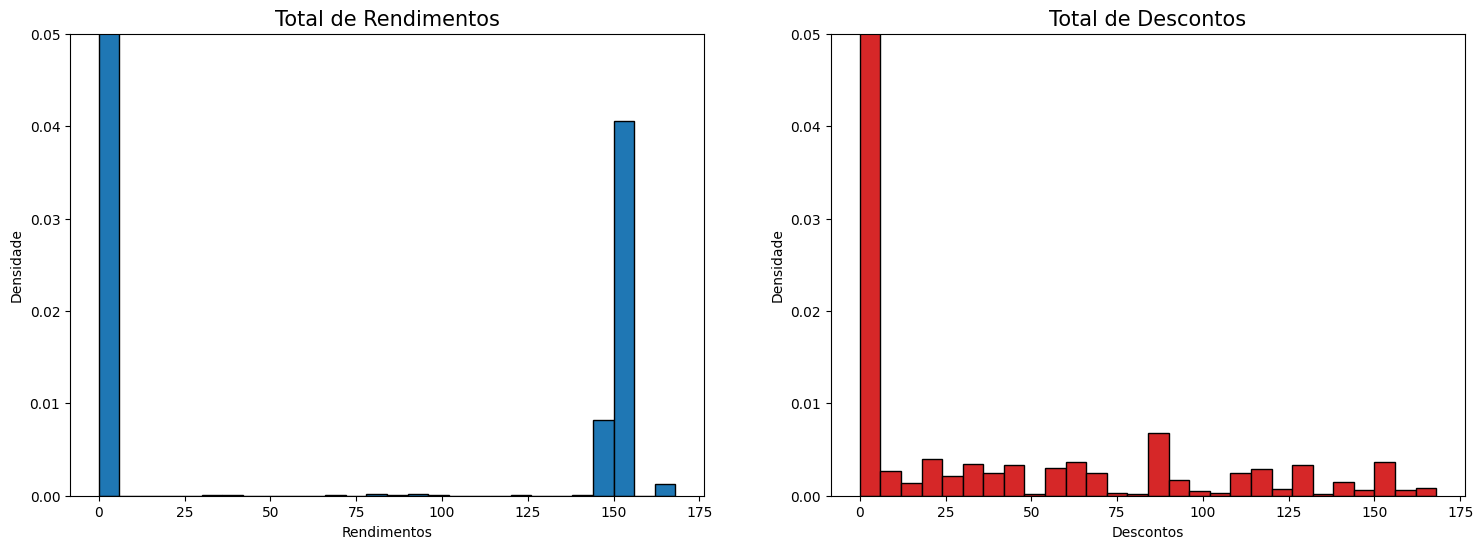

In [78]:
#Rendimentos e Descontos

intervalo = np.arange(0, 170, 6)

plt.figure(figsize=(18,6))


#gráficos

#Total Rendimentos
plt.subplot(121)
plt.hist(df.total_de_rendimentos, bins = intervalo, edgecolor='black', density = True, color = 'tab:blue')
plt.title("Total de Rendimentos", size=15)
plt.xlabel("Rendimentos")
plt.ylabel("Densidade")
plt.ylim(0,0.05)

#Total Descontos
plt.subplot(122)
plt.hist(df.total_de_descontos , bins = intervalo, edgecolor='black', density = True, color = 'tab:red')
plt.title("Total de Descontos", size=15)
plt.xlabel("Descontos")
plt.ylabel("Densidade")
plt.ylim(0,0.05)


plt.show()

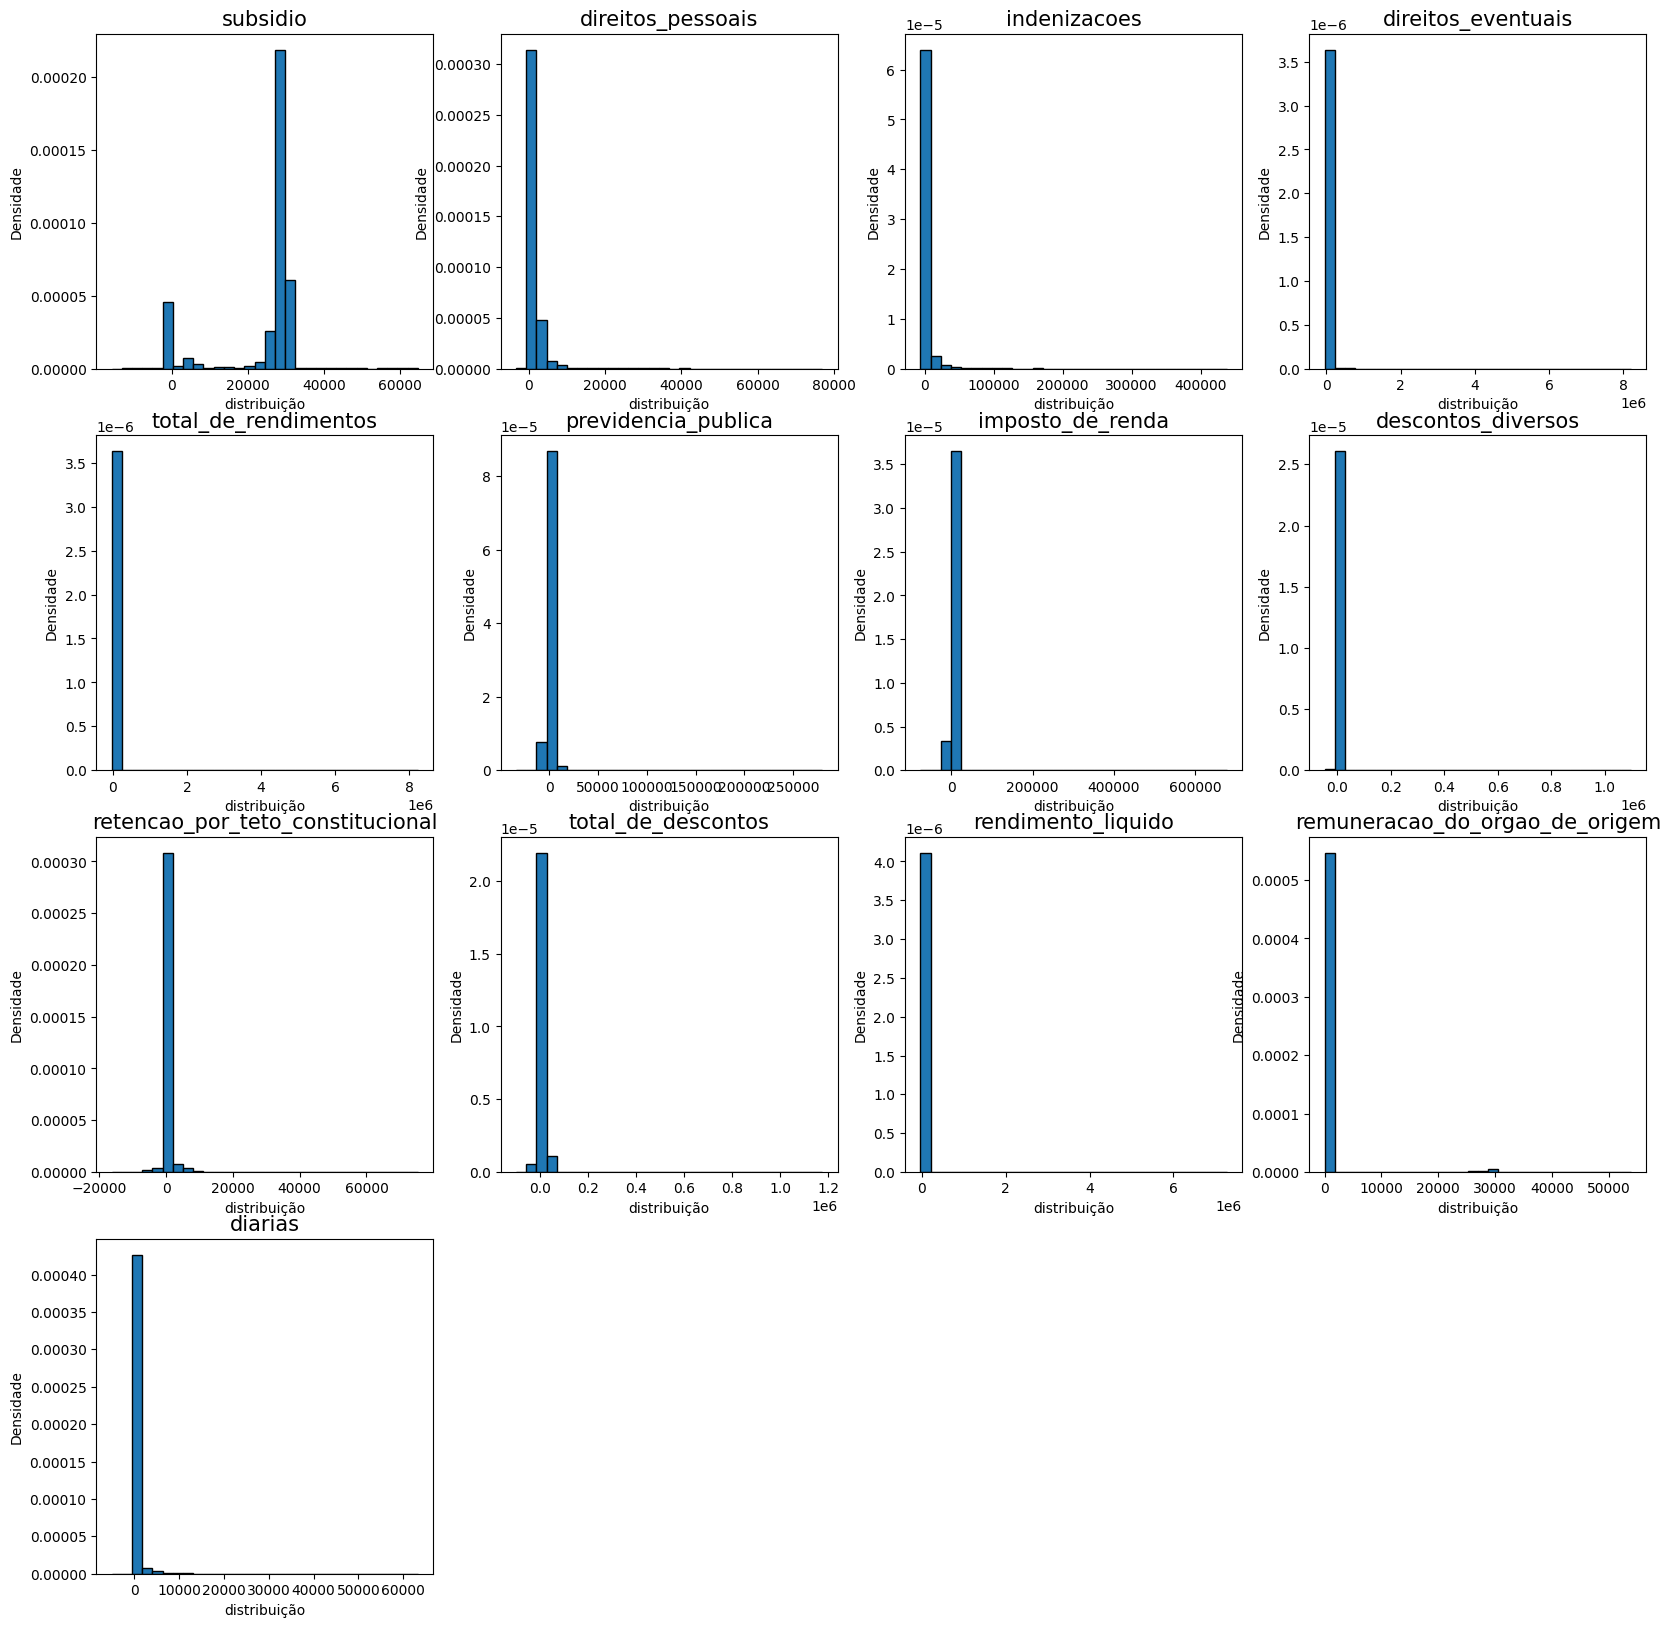

In [79]:
nomes = ['subsidio','direitos_pessoais','indenizacoes','direitos_eventuais','total_de_rendimentos','previdencia_publica','imposto_de_renda','descontos_diversos','retencao_por_teto_constitucional','total_de_descontos','rendimento_liquido','remuneracao_do_orgao_de_origem','diarias']
plt.figure(figsize=(20,20))
NPlot = 1
for i in nomes:
   

    plt.subplot(4,4,NPlot)
    plt.hist(df[i], bins = 30, edgecolor='black', density = True, color = 'tab:blue')
    plt.title(f'{i}', size=15)
    plt.xlabel("distribuição")
    plt.ylabel("Densidade")

    NPlot += 1
    #plt.ylim(0,0.5)
plt.show()

-----------------------------------------

-----------

### **Agora, para que possamos posteriormente analisar os magistrados por local de atuação, dividiremos os tribunais por estado de origem, também elencando cada estado por região geográfica**

In [80]:
# Criaremos um grande dicionário único, que separa os Tribunais por estados nos quais estão localizados e esses estados pelas respectivas regiões geográficas.

Tribunais = {
    'Norte': {'Acre' : ["Tribunal de Justiça do Acre", "Tribunal Regional Eleitoral do Acre"], 'Amapá':["Tribunal de Justiça do Amapá", "Tribunal Regional Eleitoral do Amapá"], 'Amazonas' : ["Tribunal de Justiça do Amazonas", "Tribunal Regional Eleitoral do Amazonas", 'Tribunal Regional do Trabalho da 11ª Região', 'Tribunal Regional do Trabalho da 11ª Região (RR e AM)'], 'Pará':["Tribunal de Justiça do Pará", "Tribunal Regional Eleitoral do Pará", 'Tribunal Regional do Trabalho da 8ª Região', 'Tribunal Regional do Trabalho da 8ª Região (PA e AP)'], 'Rondônia':["Tribunal de Justiça de Rondônia", "Tribunal Regional Eleitoral de Rondônia", 'Tribunal Regional do Trabalho da 14ª Região', 'Tribunal Regional do Trabalho da 14ª Região  (AC e RO)', 'Tribunal Regional do Trabalho da 14ª Região (AC e RO)'], 'Roraima':["Tribunal de Justiça de Roraima", "Tribunal Regional Eleitoral de Roraima"], 'Tocantins':["Tribunal de Justiça de Tocantins","Tribunal Regional Eleitoral de Tocantins"]},
    'Nordeste': {'Alagoas' :["Tribunal de Justiça de Alagoas", "Tribunal Regional Eleitoral de Alagoas", 'Tribunal Regional do Trabalho da 19ª Região', 'Tribunal Regional do Trabalho da 19ª Região (AL)'], 'Bahia': ["Tribunal de Justiça da Bahia", "Tribunal Regional Eleitoral da Bahia", 'Tribunal Regional do Trabalho da 5ª Região', 'Tribunal Regional do Trabalho da 5ª Região (BA)'], 'Ceará':["Tribunal de Justiça do Ceará", "Tribunal Regional Eleitoral do Ceará", 'Tribunal Regional do Trabalho da 7ª Região', 'Tribunal Regional do Trabalho da 7ª Região (CE)'],  'Maranhão' : ["Tribunal de Justiça do Maranhão", "Tribunal Regional Eleitoral do Maranhão", 'Tribunal Regional do Trabalho da 16ª Região', 'Tribunal Regional do Trabalho da 16ª Região (MA)'], 'Paraíba':["Tribunal de Justiça da Paraíba", "Tribunal Regional Eleitoral da Paraíba", 'Tribunal Regional do Trabalho da 13ª Região', 'Tribunal Regional do Trabalho da 13ª Região (PB)'], 'Pernambuco' : ["Tribunal Regional Federal da 5a Região", "Tribunal de Justiça de Pernambuco", "Tribunal Regional Eleitoral de Pernambuco", 'Tribunal Regional do Trabalho da 6ª Região','Tribunal Regional do Trabalho da 6ª Região(PE)', 'Tribunal Regional do Trabalho da 6ª Região (PE)' ], 'Piauí': ["Tribunal de Justiça do Piauí", "Tribunal Regional Eleitoral do Piauí", 'Tribunal Regional do Trabalho da 22ª Região', 'Tribunal Regional do Trabalho da 22ª Região (PI)'], 'Rio Grande do Norte':["Tribunal de Justiça do Rio Grande do Norte", "Tribunal Regional Eleitoral do Rio Grande do Norte", 'Tribunal Regional do Trabalho da 21ª Região','Tribunal Regional do Trabalho da 21ª Região (RN)' ], 'Sergipe':["Tribunal de Justiça de Sergipe", "Tribunal Regional Eleitoral de Sergipe",'Tribunal Regional do Trabalho da 20ª Região', 'Tribunal Regional do Trabalho da 20ª Região  (SE)', 'Tribunal Regional do Trabalho da 20ª Região (SE)']},
    'Centro-Oeste': {'Goiás' : ["Tribunal de Justiça de Goiás", "Tribunal Regional Eleitoral de Goiás", 'Tribunal Regional do Trabalho da 18ª Região', 'Tribunal Regional do Trabalho da 18ª Região  (GO)', 'Tribunal Regional do Trabalho da 18ª Região (GO)'], 'Mato Grosso':["Tribunal de Justiça do Mato Grosso", "Tribunal Regional Eleitoral do Mato Grosso", 'Tribunal Regional do Trabalho da 23ª Região', 'Tribunal Regional do Trabalho da 23ª Região(MT)','Tribunal Regional do Trabalho da 23ª Região (MT)'], 'Mato Grosso do Sul':["Tribunal de Justiça do Mato Grosso do Sul", "Tribunal Regional Eleitoral do Mato Grosso do Sul", 'Tribunal Regional do Trabalho da 24ª Região', 'Tribunal Regional do Trabalho da 24ª Região  (MS)', 'Tribunal Regional do Trabalho da 24ª Região (MS)'], 'Distrito Federal': ["Supremo Tribunal Federal", "Superior Tribunal de Justiça", "Conselho Nacional de Justiça", "Superior Tribunal Militar", "Tribunal Superior do Trabalho / Conselho Superior da Justiça do Trabalho", "Conselho Superior da Justiça do Trabalho","Conselho da Justiça Federal", "Tribunal Superior Eleitoral", "Tribunal Regional Federal da 1a Região", "Tribunal de Justiça do Distrito Federal e Territórios", "Tribunal Regional Eleitoral do Distrito Federal e Territórios", 'Tribunal Regional do Trabalho da 10ª Região', 'Tribunal Regional do Trabalho da 10ª Região  (DF e TO)', 'Tribunal Regional do Trabalho da 10ª Região (DF e TO)','Tribunal Superior do Trabalho / Conselho Superior da Justiça do Trabalho', 'Tribunal Superior do Trabalho/Conselho Superior da Justiça do Trabalho', 'Tribunal Superior do Trabalho/ Conselho Superior da Justiça do Trabalho']},
'Sudeste': {'Espírito Santo': ["Tribunal de Justiça do Espírito Santo", "Tribunal Regional Eleitoral do Espírito Santo", 'Tribunal Regional do Trabalho da 17ª Região', 'Tribunal Regional do Trabalho da 17ª Região (ES)'], 'Minas Gerais':["Tribunal Regional Federal da 6a Região", "Tribunal de Justiça de Minas Gerais", "Tribunal Regional Eleitoral de Minas Gerais", 'Tribunal Regional do Trabalho da 3ª Região', 'Tribunal Regional do Trabalho da 3ª Região(MG)', 'Tribunal Regional do Trabalho da 3ª Região (MG)', 'Tribunal de Justiça Militar do Estado de Minas Gerais'], 'Rio de Janeiro' : ["Tribunal Regional Federal da 2a Região", "Tribunal de Justiça do Rio de Janeiro", "Tribunal Regional Eleitoral do Rio de Janeiro", 'Tribunal Regional do Trabalho da 1ª Região(RJ)', 'Tribunal Regional do Trabalho da 1ª Região','Tribunal Regional do Trabalho da 1ª Região (RJ)'], 'São Paulo' : ["Tribunal Regional Federal da 3a Região", "Tribunal de Justiça de São Paulo", "Tribunal Regional Eleitoral de São Paulo", 'Tribunal Regional do Trabalho da 2ª Região', 'Tribunal Regional do Trabalho da 2ª Região (SP capital)', 'Tribunal Regional do Trabalho da 15ª Região', 'Tribunal Regional do Trabalho da 15ª Região (SP Interior)', 'Tribunal de Justiça Militar do Estado de São Paulo']},
    'Sul': {'Paraná' : ["Tribunal de Justiça do Paraná", "Tribunal Regional Eleitoral do Paraná", 'Tribunal Regional do Trabalho da 9ª Região', 'Tribunal Regional do Trabalho da 9ª Região (PR)'], 'Rio Grande do Sul': ["Tribunal Regional Federal da 4a Região", "Tribunal de Justiça do Rio Grande do Sul", "Tribunal Regional Eleitoral do Rio Grande do Sul", 'Tribunal Regional do Trabalho da 4ª Região', 'Tribunal Regional do Trabalho da 4ª Região(RS)', 'Tribunal Regional do Trabalho da 4ª Região (RS)', 'Tribunal de Justiça Militar do Estado do Rio Grande do Sul'], 'Santa Catarina' : ["Tribunal de Justiça de Santa Catarina", "Tribunal Regional Eleitoral de Santa Catarina", 'Tribunal Regional do Trabalho da 12ª Região', 'Tribunal Regional do Trabalho da 12ª Região (SC)']}
}

# Esse dicionário contém não só todos os tribunais, como algumas formas pontuais e diferenciadas de escrita encontradas no documento, para que todos sejam analisados sem falta.

# Idealizando uma função que nos devolva o estado e região nos quais um tribunal está inserido.

def Local_Tribunal(tribunal):
    for regiao, estados in Tribunais.items():
        for estado in estados:
            if tribunal in estados[estado]:
                return (estado, regiao)

    return ('Na', 'Na')


# Agora já com nosso dicionário, podemos criar colunas de Estado e Região no Dataframe


df['Estado'], df['Regiao'] = zip(*df['tribunal'].apply(Local_Tribunal))

Checagem = df.loc[df['Estado'] == 'Na']

print (len(Checagem))

# Como vemos abaixo, todos os tribunais foram devidamente categorizados em Estado e Região

display(df.head(1), df.tail(1))

0


,nome,cargo,lotacao,subsidio,direitos_pessoais,indenizacoes,direitos_eventuais,total_de_rendimentos,previdencia_publica,imposto_de_renda,...,total_de_descontos,rendimento_liquido,remuneracao_do_orgao_de_origem,diarias,tribunal,orgao,data_de_publicacao,mesano_de_referencia,Estado,Regiao
0,Aldir Guimarães Passarinho Junior,Ministro do Superior Tribunal de Justiça,Superior Tribunal de Justiça,32074.85,0.0,0.0,0.0,32074.85,2907.19,6628.15,...,9535.34,22539.51,0.0,0.0,Superior Tribunal de Justiça,Superior Tribunal de Justiça,2018-04-24,2018-4-01,Distrito Federal,Centro-Oeste


,nome,cargo,lotacao,subsidio,direitos_pessoais,indenizacoes,direitos_eventuais,total_de_rendimentos,previdencia_publica,imposto_de_renda,...,total_de_descontos,rendimento_liquido,remuneracao_do_orgao_de_origem,diarias,tribunal,orgao,data_de_publicacao,mesano_de_referencia,Estado,Regiao
161766,Romeu Martinelli,Juiz Civil de 2º Grau,Aposentado,30471.11,0.0,0.0,85987.9,116459.01,5494.49,5974.28,...,11468.77,104990.24,0.0,0.0,Tribunal de Justiça Militar do Estado do Rio G...,Tribunal de Justiça Militar do Rio Grande do Sul,2017-12-06,2017-11-01,Rio Grande do Sul,Sul


### **Agora, veremos em formato Boxplot como a região de atuação influencia no salário dos magistrados**

<Figure size 800x600 with 0 Axes>

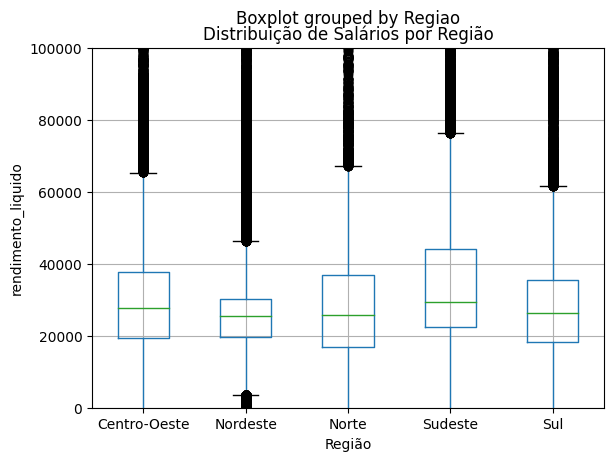

In [81]:
# Região de atuação - Salário de magistrados
plt.figure(figsize=(8, 6))
df.boxplot('rendimento_liquido', 'Regiao')
plt.xlabel('Região')
plt.ylabel('rendimento_liquido')
plt.title('Distribuição de Salários por Região')

#plotando o graf
plt.ylim(0, 100000)
plt.show()

### Como vimos, as regiões afetam consideravelmente o rendimento líquido mensal. Veremos, a seguir, como os Estados revelam discrepâncias entre os magistrados.

<Figure size 800x600 with 0 Axes>

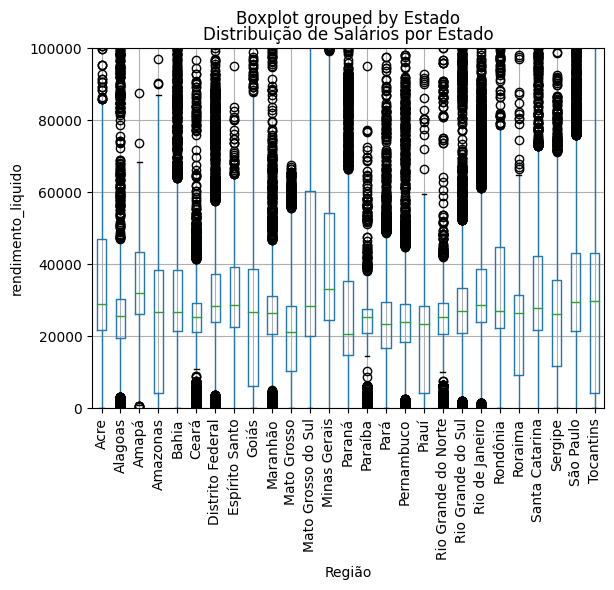

In [92]:
# Estados - Salário de magistrados

plt.figure(figsize=(8, 6))
df.boxplot('rendimento_liquido', 'Estado')
plt.xlabel('Região')
plt.ylabel('rendimento_liquido')
plt.title('Distribuição de Salários por Estado')

#plotando o graf
plt.ylim(0, 100000)
plt.xticks(rotation = 90) # Rotacionando os nomes do Eixo X para ser possível visualizarmos
plt.show()

----------------------------------------
-------------















## Mais um pouco de análise exploratória

#### Tabela de frequências

In [83]:
#Frequências de lotações

frequencia_de_lotacoes_absoluta = df.lotacao.value_counts()
frequencia_de_lotacoes_relativa = df.lotacao.value_counts(True)

#Frequência de tribunais = Frequencia de órgãos

frequencia_de_tribunais_absoluta = df.tribunal.value_counts()
frequencia_de_tribunais_relativa = df.tribunal.value_counts(True)

#### Outros dados importantes

In [84]:
total_de_linhas = df.nome.count()

#Salários e descontos
salario_bruto_medio = df.total_de_rendimentos.mean()
salario_liquido_medio = df.rendimento_liquido.mean()
subsidio_medio = df.subsidio.mean()
imposto_de_renda_medio = df.imposto_de_renda.mean()

#Encontrando a porcentagem de magistrados indenizados
zero_count_indenizacoes = (df['indenizacoes'] == 0).sum()
total_de_indenizacoes = total_de_linhas - zero_count_indenizacoes
porcentagem_de_magistrados_indenizados = (total_de_indenizacoes/total_de_linhas) * 100

#Encontrando a porcentagem de magistrados com direitos pessoais (auxílios)
zero_count_auxilios = (df['direitos_pessoais'] == 0).sum()
total_de_auxilios = total_de_linhas - zero_count_auxilios
porcentagem_de_magistrados_com_auxilios = (total_de_auxilios/total_de_linhas) * 100

#Encontrando a porcentagem de magistrados com direitos eventuais (auxílios especiais)
zero_count_auxilios_especiais = (df['direitos_eventuais'] == 0).sum()
total_de_auxilios_especias = total_de_linhas - zero_count_auxilios_especiais
porcentagem_de_magistrados_com_auxilios_especiais = (total_de_auxilios_especias/total_de_linhas) * 100
porcentagem_de_magistrados_com_auxilios_especiais

#Encontrando a porcentagem de magistrados com descontos de previdencia pública
zero_count_previdencia_publica = (df['previdencia_publica'] == 0).sum()
total_de_previdencias_publicas = total_de_linhas - zero_count_previdencia_publica
porcentagem_de_magistrados_com_previdencias_publicas = (total_de_previdencias_publicas/total_de_linhas) * 100

#Encontrando a porcentagem de magistrados com descontos diversos
zero_count_descontos_diversos = (df['descontos_diversos'] == 0).sum()
total_de_descontos_diversos = total_de_linhas - zero_count_descontos_diversos
porcentagem_de_magistrados_com_descontos_diversos = (total_de_descontos_diversos/total_de_linhas) * 100

Correlations about the explored and Scatter Graphs

#### Heatmap

In [94]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1)
plt.show()

ValueError: could not convert string to float: 'Aldir Guimarães Passarinho Junior'

<Figure size 2000x1600 with 0 Axes>

In [ ]:

RendimentoBaixo = (df['total_de_rendimentos'] < 10000).sum()
RendimentoBaixo

23307

## Regressão Random Forrest Regressor

In [ ]:
def run_random_forest_regression(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    # Initialize the RandomForestRegressor
    reg = RandomForestRegressor() # You can adjust hyperparameters here

    # Fit the model on the training data
    reg.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = reg.predict(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse:.2f}")

    return reg


In [ ]:
# Example Data
X = [df['Estado']]  # Feature matrix
y = [df['rendimento_liquido']]  # Target vector

# Call the function
model = run_random_forest_regression(X, y)


ValueError: With n_samples=1, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## Regressão Linear

Vamos agora fazer a regressão linear dos nossos dados que é utilizada para prever um TARGET qualitativo que é o nosso caso (rendimento_liquido)

In [ ]:
def linear_regression_model(df, features_columns, target_column, test_size=0.2):
    """
    Executa a regressão linear em um DataFrame usando colunas específicas como features.

    :param df: DataFrame contendo os dados.
    :param features_columns: Lista com os nomes das colunas a serem usadas como features.
    :param target_column: Nome da coluna que é o target (variável dependente).
    :param test_size: Proporção do conjunto de teste (padrão é 0.2).
    :return: Retorna o modelo treinado e as métricas de desempenho.
    """

    # Selecionar as features e o target
    X = df[features_columns]
    y = df[target_column]

    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # Criar e treinar o modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prever os valores para o conjunto de teste
    y_pred = model.predict(X_test)

    # Calcular métricas de desempenho
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return model, mse, r2

#### One-Hot Encoding

In [ ]:
# Aplicando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['cargo'], drop_first=True)
df_encoded

,nome,lotacao,subsidio,direitos_pessoais,indenizacoes,direitos_eventuais,total_de_rendimentos,previdencia_publica,imposto_de_renda,descontos_diversos,...,cargo_Três Lagoas,cargo_Turma Recursal,cargo_Turma Recursal - Suplente,cargo_Vice - Presidente do Tribunal de Justiça,cargo_Vice-Presidência,cargo_Vice-presidente-corregedor - Efetivo,cargo_corregedoria regional eleitoral,cargo_juízes da corte,cargo_presidência,cargo_Água Clara
0,Aldir Guimarães Passarinho Junior,Superior Tribunal de Justiça,32074.85,0.00,0.00,0.00,32074.85,2907.19,6628.15,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Antonio Carlos Ferreira,Gabinete Ministro Antonio Carlos Ferreira,32074.85,3528.23,884.00,0.00,36487.08,3528.23,6980.96,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Antônio de Pádua Ribeiro,Superior Tribunal de Justiça,32074.85,0.00,0.00,0.00,32074.85,2907.19,6628.15,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Antonio Herman de Vasconcellos e Benjamin,Gabinete Ministro Herman Benjamin,32074.85,3528.23,884.00,0.00,36487.08,3528.23,6980.96,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Antonio Saldanha Palheiro,Gabinete Ministro Antonio Saldanha Palheiro,32074.85,621.03,5261.73,0.00,37957.61,621.03,7951.22,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161762,José Ernando Pereira,Aposentado,22213.44,0.00,0.00,71397.78,93611.22,3909.66,4073.48,0.0,...,0,0,0,0,0,0,0,0,0,0
161763,Juarez de Souza Moreira,Aposentado,27424.01,0.00,0.00,74013.51,101437.52,4690.28,5305.78,0.0,...,0,0,0,0,0,0,0,0,0,0
161764,Mathias Nagelstein,Aposentado,30471.11,0.00,0.00,95176.22,125647.33,4858.50,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
161765,Octavio Augusto Simon de Souza,Aposentado,30471.11,0.00,0.00,0.00,30471.11,3491.57,6497.87,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.dropna(inplace=True)

In [ ]:
colunas_features = df_encoded[['cargo_0',
 'cargo_01.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_01.JUIZ DE DIREITO SUBST.DE 2.GRAU',
 'cargo_01ª Zona Eleitoral',
 'cargo_02.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_02ª Zona Eleitoral',
 'cargo_03.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_03ª Zona Eleitoral',
 'cargo_04.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_04ª Zona Eleitoral',
 'cargo_05.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_05ª Zona Eleitoral',
 'cargo_06.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_07.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_07ª Zona Eleitoral',
 'cargo_08.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_08ª Zona Eleitoral',
 'cargo_09ª Zona Eleitoral',
 'cargo_10 - DESEMBARGADOR',
 'cargo_10ª Zona Eleitoral',
 'cargo_11ª Zona Eleitoral',
 'cargo_12ª Zona Eleitoral',
 'cargo_13 - JUIZ SUBSTITUTO',
 'cargo_13ª Zona Eleitoral',
 'cargo_14 - JUIZ AUDITOR DA JUSTICA MILITAR',
 'cargo_15 - JUIZ AUDITOR SUBST. J. M.',
 'cargo_15ª Zona Eleitoral',
 'cargo_16ª Zona Eleitoral',
 'cargo_17ª Zona Eleitoral',
 'cargo_18ª Zona Eleitoral',
 'cargo_19ª Zona Eleitoral',
 'cargo_20ª Zona Eleitoral',
 'cargo_21.JUIZ DE DIREITO DE 02.GRAU',
 'cargo_219 - JUIZ DE DIREITO DE E. FINAL',
 'cargo_21ª Zona Eleitoral',
 'cargo_220 - JUIZ DE DIREITO DE E. ESPECIAL',
 'cargo_224 - JUIZ DE DIREITO DE E. INICIAL',
 'cargo_23.JUIZ DE DIREITO DE 02.GRAU',
 'cargo_25ª Zona Eleitoral',
 'cargo_26ª Zona Eleitoral',
 'cargo_27ª Zona Eleitoral',
 'cargo_28ª Zona Eleitoral',
 'cargo_29ª Zona Eleitoral',
 'cargo_30ª Zona Eleitoral',
 'cargo_32ª Zona Eleitoral',
 'cargo_34ª Zona Eleitoral',
 'cargo_35ª Zona Eleitoral',
 'cargo_371 - 01.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_372 - 02.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_373 - 03.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_374 - 04.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_375 - 05.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_376 - 06.JUIZ DE DIREITO DE 02. GRAU',
 'cargo_95 - 01.JUIZ DE DIREITO SUBST.DE 2.GRAU',
 'cargo_ADVOGADO',
 'cargo_ADVOGADO DE OFICIO JM',
 'cargo_ADVOGADO JURISTA',
 'cargo_APOSENTADO',
 'cargo_APOSENTADOS',
 'cargo_AUTORIDADE ELEITORAL - JUIZ',
 'cargo_AUTORIDADE ELEITORAL - MEMBRO',
 'cargo_AUXILIAR DE SERVICOS GERAIS',
 'cargo_AUXILIAR JUDICIARIO-CATEGORIA GERAL',
 'cargo_AUXILIAR JUDICIARIO-CATEGORIA GERAL (ANALISTA JUDICIARIO - AREA DE APOIO JUDICIARIO E ADMINISTRATIVO) - LEI Nº 17.663/2012, ANEXO IX',
 'cargo_Amambai',
 'cargo_Anastacio',
 'cargo_Anaurilândia',
 'cargo_Angélica',
 'cargo_Aparecida do Taboado',
 'cargo_Aquidauana',
 'cargo_Autoridade Eleitoral - Juiz Eleitoral',
 'cargo_Autoridade Eleitoral - Membro',
 'cargo_Bandeirantes',
 'cargo_Bataguassu',
 'cargo_Batayporã',
 'cargo_Bela Vista',
 'cargo_Bonito',
 'cargo_Brasilândia',
 'cargo_CENTRAIS ELETRICA DE GOIAS',
 'cargo_CLASSISTA',
 'cargo_CLASSISTA APOSENTADO',
 'cargo_CONSELHEIRO',
 'cargo_CONSELHEIRO/CORREGEDOR',
 'cargo_CONSELHEIRO/PRESIDENTE',
 'cargo_Caarapó',
 'cargo_Camapuã',
 'cargo_Campo Grande',
 'cargo_Cassilândia',
 'cargo_Chapadão do Sul',
 'cargo_Conselho de Supervisão dos Juizados Especiais',
 'cargo_Corregedor-Geral Adjunto',
 'cargo_Corregedor-Geral de Justiça',
 'cargo_Corregedoria Geral de Justiça',
 'cargo_Corumbá',
 'cargo_Costa Rica',
 'cargo_Coxim',
 'cargo_DD0001 - DESEMBARGADOR',
 'cargo_DD0001 DESEMBARGADOR',
 'cargo_DD0002 - DESEMBARGADOR PRESIDENTE',
 'cargo_DD0002 DESEMBARGADOR PRESIDENTE',
 'cargo_DD0004 - DESEMBARGADOR CORREGEDOR',
 'cargo_DD0004 DESEMBARGADOR CORREGEDOR',
 'cargo_DD0005 - DESEMBARGADOR PRIMEIRO VICE-PRESIDENTE',
 'cargo_DD0005 DESEMBARGADOR PRIMEIRO VICE-PRESIDENTE',
 'cargo_DD0006 - DESEMBARGADOR SEGUNDO VICE-PRESIDENTE',
 'cargo_DD0006 DESEMBARGADOR SEGUNDO VICE-PRESIDENTE',
 'cargo_DES  - DESEMBARGADOR',
 'cargo_DES CLASS REP EMPREGADORES',
 'cargo_DES CLASS REP TRABALHADORES',
 'cargo_DES. FEDERAL DO TRABALHO',
 'cargo_DESEMB. FEDERAL DO TRABALHO INATIVO',
 'cargo_DESEMBARGADODR FEDERAL APOSENTADO',
 'cargo_DESEMBARGADOR',
 'cargo_DESEMBARGADOR APOSENTADO',
 'cargo_DESEMBARGADOR DO TRABALHO',
 'cargo_DESEMBARGADOR EM SUBSTITUIÇÃO',
 'cargo_DESEMBARGADOR FEDERAL',
 'cargo_DESEMBARGADOR FEDERAL - TRF',
 'cargo_DESEMBARGADOR FEDERAL APOSENTADO',
 'cargo_DESEMBARGADOR FEDERAL DO TRABALHO',
 'cargo_DESEMBARGADOR PRESIDENTE',
 'cargo_DESEMBARGADOR PRESIDENTE DO TRT',
 'cargo_DESEMBARGADOR TRABALHO',
 'cargo_DESEMBARGADOR(A) DO TRABALHO',
 'cargo_DESEMBARGADOR(A) DO TRABALHO INATIVO',
 'cargo_DESEMBARGADORA',
 'cargo_DESEMBARGADORA DO TRABALHO',
 'cargo_DESEMBARGADORA VICE-PRESIDENTE DO TRT',
 'cargo_DESLIGADO',
 'cargo_Deodápolis',
 'cargo_Des Federal/Pensionista',
 'cargo_Desembargador',
 'cargo_Desembargador Federal',
 'cargo_Desembargador Federal do Trabalho',
 'cargo_Desembargador Federal do Trabalho aposentado',
 'cargo_Desembargador do Trabalho',
 'cargo_Desembargador(a)',
 'cargo_Diretor do Foro',
 'cargo_Dois Irmãos do Buriti',
 'cargo_Dourados',
 'cargo_ESCREVENTE JUDICIARIO III',
 'cargo_ESCREVENTE JUDICIARIO III (ANALISTA JUDICIARIO - AREA DE APOIO JUDICIARIO E ADMINISTRATIVO) - LEI Nº 17.663/2012, ANEXO IX',
 'cargo_Eldorado',
 'cargo_Fátima do Sul',
 'cargo_Gabinete dos Desembargadores',
 'cargo_INATIVO- JUIZ',
 'cargo_INATIVO- JUIZ CLASSISTA II',
 'cargo_Iguatemi',
 'cargo_Inativos e Pensionistas',
 'cargo_Inocência',
 'cargo_Itaporã',
 'cargo_Itaquiraí',
 'cargo_Ivinhema',
 'cargo_JD0001 - JUIZ DE DIREITO',
 'cargo_JD0001 JUIZ DE DIREITO',
 'cargo_JD0002 - JUIZ DE DIREITO SUBSTITUTO DE SEGUNDO GRAU',
 'cargo_JD0002 JUIZ DE DIREITO SUBSTITUTO DE SEGUNDO GRAU',
 'cargo_JDT001 - JUIZ DE DIREITO DE TURMA RECURSAL',
 'cargo_JDT001 JUIZ DE DIREITO DE TURMA RECURSAL',
 'cargo_JS0002 - JUIZ DE DIREITO SUBSTITUTO DO DF',
 'cargo_JS0002 JUIZ DE DIREITO SUBSTITUTO DO DF',
 'cargo_JUIZ',
 'cargo_JUIZ (A) DE DIREITO',
 'cargo_JUIZ - FINAL',
 'cargo_JUIZ - INICIAL',
 'cargo_JUIZ - INTERMEDIARIA',
 'cargo_JUIZ APOSENTADO',
 'cargo_JUIZ AUDITOR  (JME)',
 'cargo_JUIZ AUDITOR DA JUSTICA MILITAR',
 'cargo_JUIZ AUDITOR SUBST. J. M.',
 'cargo_JUIZ AUXILIAR',
 'cargo_JUIZ AUXILIAR DE ENTRÂNCIA FINAL',
 'cargo_JUIZ CIVIL DO TJM',
 'cargo_JUIZ CLAS 2A INS EMPDORES',
 'cargo_JUIZ CLAS 2A INS EMPDOS',
 'cargo_JUIZ CLASSISTA',
 'cargo_JUIZ CLASSISTA APOSENTADO',
 'cargo_JUIZ CLASSISTA DE JCJ EXONERADO',
 'cargo_JUIZ CLASSISTA DE JCJ INATIVO',
 'cargo_JUIZ CLASSISTA DO TRIBUNAL EXONERADO',
 'cargo_JUIZ CLASSISTA DO TRIBUNAL INATIVO',
 'cargo_JUIZ CONVOCADO',
 'cargo_JUIZ DE DIREITO',
 'cargo_JUIZ DE DIREITO 1? ENTRANCIA',
 'cargo_JUIZ DE DIREITO 1ª ENTRANCIA',
 'cargo_JUIZ DE DIREITO 2? ENTRANCIA',
 'cargo_JUIZ DE DIREITO 2ª ENTRANCIA',
 'cargo_JUIZ DE DIREITO 3? ENTRANCIA',
 'cargo_JUIZ DE DIREITO 3ª ENTRANCIA',
 'cargo_JUIZ DE DIREITO AUX. DE ENTRÂNCIA INTERMEDIÁRIA',
 'cargo_JUIZ DE DIREITO AUX.DA 2A.ENTRANCIA',
 'cargo_JUIZ DE DIREITO AUXILIAR',
 'cargo_JUIZ DE DIREITO AUXILIAR DE ENTRÂNCIA FINAL',
 'cargo_JUIZ DE DIREITO DE 1A. ENTRANCIA',
 'cargo_JUIZ DE DIREITO DE 2A. ENTRANCIA',
 'cargo_JUIZ DE DIREITO DE 3A. ENTRANCIA',
 'cargo_JUIZ DE DIREITO DE E. ESPECIAL',
 'cargo_JUIZ DE DIREITO DE E. FINAL',
 'cargo_JUIZ DE DIREITO DE E. INICIAL',
 'cargo_JUIZ DE DIREITO DE ENT. ESP.',
 'cargo_JUIZ DE DIREITO DE ENT. ESP. APOSENTADO',
 'cargo_JUIZ DE DIREITO DE ENT. ESP. APOSENTADO LEI 10887/2004',
 'cargo_JUIZ DE DIREITO DE ENTR.INTERMEDIARIA',
 'cargo_JUIZ DE DIREITO DE ENTRANC.INICIAL',
 'cargo_JUIZ DE DIREITO DE ENTRANCIA FINAL',
 'cargo_JUIZ DE DIREITO DE ENTRANCIA INICIAL',
 'cargo_JUIZ DE DIREITO DE ENTRÂNCIA FINAL',
 'cargo_JUIZ DE DIREITO DE ENTRÂNCIA INICIAL',
 'cargo_JUIZ DE DIREITO DE ENTRÂNCIA INTERMEDIÁRIA',
 'cargo_JUIZ DE DIREITO DO JUIZO MILITAR',
 'cargo_JUIZ DE DIREITO JUIZO MILITAR SUBSTITUTO',
 'cargo_JUIZ DE DIREITO SUBST 2? ENTR',
 'cargo_JUIZ DE DIREITO SUBST 3? ENTR',
 'cargo_JUIZ DE DIREITO SUBSTITUTO',
 'cargo_JUIZ DE DIREITO SUBSTITUTO DO JUÍZO MILITAR',
 'cargo_JUIZ DE DIREITO TITULAR DO JUÍZO MILITAR',
 'cargo_JUIZ DE ENTRANCIA COMUM',
 'cargo_JUIZ DE ENTRANCIA COMUM APOSENTADO',
 'cargo_JUIZ DE ENTRANCIA COMUM APOSENTADO LEI 10887/2004',
 'cargo_JUIZ DE TRT',
 'cargo_JUIZ DE VARA APOSENTADO',
 'cargo_JUIZ DEFERAL',
 'cargo_JUIZ DIREITO DO JUIZO MILITAR',
 'cargo_JUIZ DO TRABALHO - PRES. JCJ',
 'cargo_JUIZ DO TRABALHO PRESIDENTE',
 'cargo_JUIZ DO TRABALHO SUBSTIT',
 'cargo_JUIZ DO TRABALHO SUBSTITUTO',
 'cargo_JUIZ DO TRABALHO SUBSTITUTO EXONERADO',
 'cargo_JUIZ DO TRABALHO SUBSTITUTO INATIVO',
 'cargo_JUIZ DO TRABALHO TITULAR',
 'cargo_JUIZ DO TRABALHO TITULAR DE VARA',
 'cargo_JUIZ DO TRIBUNAL',
 'cargo_JUIZ DO TRIBUNAL - EFETIVO',
 'cargo_JUIZ DO TRIBUNAL - SUBSTITUTO',
 'cargo_JUIZ DO TRIBUNAL DE JUSTICA MILITAR',
 'cargo_JUIZ ELEITORAL',
 'cargo_JUIZ ELEITORAL - EFETIVO',
 'cargo_JUIZ ELEITORAL - SUBSTITUTO',
 'cargo_JUIZ FEDERAL',
 'cargo_JUIZ FEDERAL APOSENTADO',
 'cargo_JUIZ FEDERAL CONVOCADO',
 'cargo_JUIZ FEDERAL SUBSTITUTO',
 'cargo_JUIZ FEDERAL SUBSTITUTO/ JUDICIÁRIA',
 'cargo_JUIZ FEDERAL/ JUDICIÁRIA',
 'cargo_JUIZ INSTRUTOR',
 'cargo_JUIZ MEMBRO',
 'cargo_JUIZ MEMBRO DA CORTE',
 'cargo_JUIZ MILITAR DO TJM',
 'cargo_JUIZ PRESIDENTE DE TRT',
 'cargo_JUIZ SUBS.DA CAPITAL-DISPONIBILID.',
 'cargo_JUIZ SUBSTITUTO',
 'cargo_JUIZ SUBSTITUTO AUX. DE ENTRÂNCIA INTERMEDIÁRIA',
 'cargo_JUIZ SUBSTITUTO DE CARREIRA',
 'cargo_JUIZ SUBSTITUTO DE ENTRANCIA INICIAL',
 'cargo_JUIZ SUBSTITUTO DE ENTRÂNCIA INTERMEDIÁRIA',
 'cargo_JUIZ SUBSTITUTO DE SEGUNDO GRAU - ENTRANCIA FINAL',
 'cargo_JUIZ TIT DE VARA DO TRABALHO',
 'cargo_JUIZ TIT DE VARA DO TRABALHO INATIVO',
 'cargo_JUIZ TITULAR',
 'cargo_JUIZ TITULAR DA 10ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 11ª VARA DE NATAL',
 'cargo_JUIZ TITULAR DA 12ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 13ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 1ª VARA DO TRABALHO DE CEARÁ MIRIM',
 'cargo_JUIZ TITULAR DA 1ª VARA DO TRABALHO DE GOIANINHA',
 'cargo_JUIZ TITULAR DA 1ª VARA DO TRABALHO DE MOSSORÓ',
 'cargo_JUIZ TITULAR DA 1ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 2ª VARA DO TRABALHO DE MACAU',
 'cargo_JUIZ TITULAR DA 2ª VARA DO TRABALHO DE MOSSORÓ',
 'cargo_JUIZ TITULAR DA 2ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 3ª VARA DO TRABALHO DE MOSSORÓ',
 'cargo_JUIZ TITULAR DA 3ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 4ª VARA DO TRABALHO DE MOSSORÓ',
 'cargo_JUIZ TITULAR DA 4ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 5ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 6ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 7ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 8º VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA 9ª VARA DO TRABALHO DE NATAL',
 'cargo_JUIZ TITULAR DA VARA DO TRABALHO DE ASSU',
 'cargo_JUIZ TITULAR DA VARA DO TRABALHO DE CAICÓ',
 'cargo_JUIZ TITULAR DA VARA DO TRABALHO DE CURRAIS NOVOS',
 'cargo_JUIZ TITULAR DA VARA DO TRABALHO DE MACAU',
 'cargo_JUIZ TITULAR DE VARA',
 'cargo_JUIZ TITULAR DE VARA DO TRABALHO',
 'cargo_JUIZ TITULAR DE VARA DO TRABALHO EXONERADO',
 'cargo_JUIZ TITULAR DE VARA DO TRABALHO INATIVO',
 'cargo_JUIZ TITULAR DE VFT',
 'cargo_JUIZ TITULAR VARA DO TRABALHO',
 'cargo_JUIZ TOGADO TRT',
 'cargo_JUIZ TRABALHO SUBSTITUTO',
 'cargo_JUIZ-AUDITOR',
 'cargo_JUIZ-AUDITOR CORREGEDOR',
 'cargo_JUIZ-AUDITOR SUBSTITUTO',
 'cargo_JUIZA DE DIREITO',
 'cargo_JURISTA',
 'cargo_JUZ1 - JUIZ DE DIREITO DE 1ª ENTRÂNCIA',
 'cargo_JUZ2 - JUIZ DE DIREITO DE 2ª ENTRÂNCIA',
 'cargo_JUZ3 - JUIZ DE DIREITO DE 3ª ENTRÂNCIA',
 'cargo_JUZS - JUIZ DE DIREITO SUBSTITUTO',
 'cargo_JUÍZA DO TRABALHO SUBSTITUTA',
 'cargo_JUÍZA DO TRABALHO TITULAR DE VARA',
 'cargo_JUÍZA FEDERAL',
 'cargo_Jardim',
 'cargo_Juiz - Efetivo',
 'cargo_Juiz - Substituto',
 'cargo_Juiz - substituto',
 'cargo_Juiz Auxiliar',
 'cargo_Juiz Auxiliar da Corregedoria-Geral de Justiça',
 'cargo_Juiz Auxiliar da Presidência',
 'cargo_Juiz Auxiliar da Vice - Presidência',
 'cargo_Juiz Auxiliar no STJ',
 'cargo_Juiz Civil de 1º Grau',
 'cargo_Juiz Civil de 2º Grau',
 'cargo_Juiz Convocado',
 'cargo_Juiz Corregedor-Geral',
 'cargo_Juiz Dir.1ª Entrância',
 'cargo_Juiz Dir.2ª Entrância',
 'cargo_Juiz Dir.3ª Entrância',
 'cargo_Juiz Diretor do Foro dos Juizados Especiais',
 'cargo_Juiz Eleitoral',
 'cargo_Juiz Entrância Intermediária',
 'cargo_Juiz Federal',
 'cargo_Juiz Federal Substituto',
 'cargo_Juiz Instrutor',
 'cargo_Juiz Instrutor no STJ',
 'cargo_Juiz Membro',
 'cargo_Juiz Membro da Corte',
 'cargo_Juiz Militar de 2º Grau',
 'cargo_Juiz Presidente',
 'cargo_Juiz Substituto',
 'cargo_Juiz Titular de Vara do Trabalho',
 'cargo_Juiz Titular de Vara do Trabalho aposentado',
 'cargo_Juiz Togado',
 'cargo_Juiz Vice-Presidente',
 'cargo_Juiz da Vara do Trabalho',
 'cargo_Juiz de Alçada',
 'cargo_Juiz de Direito',
 'cargo_Juiz de Direito - Entrância Especial',
 'cargo_Juiz de Direito Auxiliar - Capital/Interior',
 'cargo_Juiz de Direito Auxiliar - Entrância Especial',
 'cargo_Juiz de Direito Auxiliar da Capital',
 'cargo_Juiz de Direito Entr. Especial',
 'cargo_Juiz de Direito Substituta de 1º Grau',
 'cargo_Juiz de Direito Substituto',
 'cargo_Juiz de Direito Substituto em 2º Grau',
 'cargo_Juiz de Direito Substituto em Segundo Grau',
 'cargo_Juiz de Direito da Turma Recursal dos Juizados Especiais',
 'cargo_Juiz de Direito de 1ªentrância',
 'cargo_Juiz de Direito de 1º Grau',
 'cargo_Juiz de Direito de 2ªentrância',
 'cargo_Juiz de Direito de Comarca de Entrância Final',
 'cargo_Juiz de Direito de Comarca de Entrância Inicial',
 'cargo_Juiz de Direito de Comarca de Entrância Intermediária',
 'cargo_Juiz de Direito de Entrancia Final',
 'cargo_Juiz de Direito de Entrancia Inicial',
 'cargo_Juiz de Direito de Entrância Final',
 'cargo_Juiz de Direito de Entrância Inicial',
 'cargo_Juiz de Direito de Entrância Intermediária',
 'cargo_Juiz de Direito de Primeira Entrância',
 'cargo_Juiz de Direito de Segunda Entrância',
 'cargo_Juiz de Primeira Entrância',
 'cargo_Juiz de Segunda Entrância',
 'cargo_Juiz de entrância especial',
 'cargo_Juiz do Trabalho Substituto',
 'cargo_Juiz do Trabalho Substituto aposentado',
 'cargo_Juiz(a) Substituto',
 'cargo_Juiz(a) Substituto(a)',
 'cargo_Juiz(a) Togado',
 'cargo_Juiz(a) de 1 Entrancia',
 'cargo_Juiz(a) de 2 Entrancia',
 'cargo_Juiz(a) de 3 Entrancia',
 'cargo_Juiz(a) de Direito',
 'cargo_Juiz(a) de Direito da 1ª Entrância',
 'cargo_Juiz(a) de Direito da 2ª Entrância',
 'cargo_Juiz(a) de Direito da 3ª Entrância',
 'cargo_Juiz(a) de Direito sem Titularidade',
 'cargo_Juiza Civil de 2º Grau',
 'cargo_Juiza de Direito Substituta de 1º Grau',
 'cargo_Juiza de Direito de 1º Grau',
 'cargo_Juizado Especial',
 'cargo_Jurista',
 'cargo_MAGISTRADO',
 'cargo_MAGISTRADO CONVOCADO AUXILIAR',
 'cargo_MAGISTRADOS - DIFERENÇAS DE DECISÃO JUDICIAL',
 'cargo_MEMBRO',
 'cargo_MEMBRO - EFETIVO',
 'cargo_MEMBRO - SUBSTITUTO',
 'cargo_MEMBRO DO JUDICIARIO / MAGISTRADO',
 'cargo_MEMBRO SUBSTITUTO',
 'cargo_MEMBRO SUBSTITUTO - ADVOGADO',
 'cargo_MEMBRO SUBSTITUTO - DESEMBARGADOR',
 'cargo_MEMBRO SUBSTITUTO - PROCURADOR',
 'cargo_MEMBRO TITULAR',
 'cargo_MEMBRO TITULAR - ADVOGADA',
 'cargo_MEMBRO TITULAR - ADVOGADO',
 'cargo_MEMBRO TITULAR - DESEMBARGADOR',
 'cargo_MEMBRO TITULAR - DESEMBARGADORA',
 'cargo_MEMBRO TITULAR - JUIZ DIREITO',
 'cargo_MEMBRO TITULAR - JUIZA FEDERAL',
 'cargo_MEMBRO TITULAR - PRESIDENTE',
 'cargo_MEMBRO TITULAR - PROCURADOR',
 'cargo_MEMBRO TITULAR DESEMBARGADORA',
 'cargo_MINISTRO',
 'cargo_MINISTRO DO STF',
 'cargo_MINISTRO DO SUPERIOR TRIBUNAL MILITAR',
 'cargo_MINISTRO TOGADO',
 'cargo_Magistrado Aposentado',
 'cargo_Magistrado Convocado',
 'cargo_Magistrado Inativo',
 'cargo_Magistrado em Atividade',
 'cargo_Maracaju',
 'cargo_Membro',
 'cargo_Membro - Efetivo',
 'cargo_Membro - Substituto',
 'cargo_Membro substituto',
 'cargo_Ministro',
 'cargo_Ministro - Efetivo',
 'cargo_Ministro - Substituto',
 'cargo_Ministro do Superior Tribunal de Justiça',
 'cargo_Miranda',
 'cargo_Mundo Novo',
 'cargo_Naviraí',
 'cargo_Nioaque',
 'cargo_Nova Alvorada do Sul',
 'cargo_Nova Andradina',
 'cargo_PENSAO CANCELADA',
 'cargo_PENSIONISTA',
 'cargo_PENSIONISTA - DESEMBARGADOR DO TRABALHO',
 'cargo_PENSIONISTA - JUIZ CLASSISTA II',
 'cargo_PENSIONISTA CIVIL - CLASSISTA',
 'cargo_PENSIONISTA CIVIL - DESEMBARGADOR DO TRABALHO',
 'cargo_PENSIONISTA CIVIL - JUIZ CLASSISTA',
 'cargo_PENSIONISTA CIVIL - JUIZ TITULAR DE VARA DO TRABALHO',
 'cargo_PENSIONISTA CIVIL - TITULAR DE VARA DO TRABALHO',
 'cargo_PENSIONISTA CIVIL DE DESEMBARGADOR(A) DO TRABALHO',
 'cargo_PENSIONISTA CIVIL DE JUIZ CLASSISTA DO TRIBUNAL',
 'cargo_PENSIONISTA CIVIL DE JUIZ DO TRABALHO SUBSTITUTO',
 'cargo_PENSIONISTA CIVIL DE JUIZ TITULAR DE VARA DO TRABALHO',
 'cargo_PENSIONISTA DE ABEL CARVALHO SALGADO FILHO',
 'cargo_PENSIONISTA DE ADEMAR JORGE',
 'cargo_PENSIONISTA DE ADEMIR BRASILIO',
 'cargo_PENSIONISTA DE AFONSO KRAUS',
 'cargo_PENSIONISTA DE AIRTON MAIA NOBREGA',
 'cargo_PENSIONISTA DE ALBERICO BEZERRA SOBREIRA',
 'cargo_PENSIONISTA DE ALBERTO AQUINO',
 'cargo_PENSIONISTA DE ALBERTO DOS SANTOS FREITAS',
 'cargo_PENSIONISTA DE ALCEU CABRAL DE MEDEIROS',
 'cargo_PENSIONISTA DE ALCIDES FRANCISCO',
 'cargo_PENSIONISTA DE ALEX HARDT',
 'cargo_PENSIONISTA DE ALFREDO NAGIB',
 'cargo_PENSIONISTA DE ALFREDO SPINARDI',
 'cargo_PENSIONISTA DE ALUYSIO MENDONCA SAMPAIO',
 'cargo_PENSIONISTA DE AMADEU DO CARMO',
 'cargo_PENSIONISTA DE AMAURI MASCARO NASCIMENTO',
 'cargo_PENSIONISTA DE AMERICO DOMINGUES',
 'cargo_PENSIONISTA DE AMERICO PEREIRA DA SILVA',
 'cargo_PENSIONISTA DE ANGELO CORDEIRO',
 'cargo_PENSIONISTA DE ANTENOR LIMA COSTA',
 'cargo_PENSIONISTA DE ANTONIO DA GRACA CASEIRO',
 'cargo_PENSIONISTA DE ANTONIO DIRCEU DE LEAO',
 'cargo_PENSIONISTA DE ANTONIO DONATO',
 'cargo_PENSIONISTA DE ANTONIO DURIGAN',
 'cargo_PENSIONISTA DE ANTONIO EXPEDITO SANTOS SOARES',
 'cargo_PENSIONISTA DE ANTONIO JOSÉ TEIXEIRA DE CARVALHO',
 'cargo_PENSIONISTA DE ANTONIO PADULA MORENO',
 'cargo_PENSIONISTA DE ANTONIO ROMERO',
 'cargo_PENSIONISTA DE ANTONIO TERRAS',
 'cargo_PENSIONISTA DE APARECIDA DE SOUZA LIMA E OLIVEIRA',
 'cargo_PENSIONISTA DE ARGEMIRO GOMES',
 'cargo_PENSIONISTA DE ARILDO CANDIA BARBOSA',
 'cargo_PENSIONISTA DE ARISTEO BREDA',
 'cargo_PENSIONISTA DE ARISTIDES DE JESUS RODRIGUES',
 'cargo_PENSIONISTA DE ARMANDO COPPOLA',
 'cargo_PENSIONISTA DE ARNALDO MENDES GARCIA',
 'cargo_PENSIONISTA DE ARNOR GOMES DA SILVA',
 'cargo_PENSIONISTA DE AUGUSTO AP. ARROYO MARCHI',
 'cargo_PENSIONISTA DE AURELIO MENDES DE OLIVEIRA',
 'cargo_PENSIONISTA DE AYRES RODRIGUES',
 'cargo_PENSIONISTA DE BAPTISTA CLAUDIO PIROZZI',
 'cargo_PENSIONISTA DE BRAZ JOSE MOLLICA',
 'cargo_PENSIONISTA DE CARLOS AUGUSTO RIBEIRO DE MENDONCA',
 'cargo_PENSIONISTA DE CARLOS DE FIGUEIREDO SA',
 'cargo_PENSIONISTA DE CARLOS EDUARDO FIGUEIREDO',
 'cargo_PENSIONISTA DE CASSIO RAPOSO NOVO',
 'cargo_PENSIONISTA DE CELIO JOSE RODRIGUES DA MATA',
 'cargo_PENSIONISTA DE CELSO ALONSO',
 'cargo_PENSIONISTA DE CELSO JOSE DE FARIA OGNIBENE',
 'cargo_PENSIONISTA DE CELSO MENDES PERES CARPINTERO',
 'cargo_PENSIONISTA DE CHRISPINIANO CARRAZEDO',
 'cargo_PENSIONISTA DE CID CESAR PIMENTEL',
 'cargo_PENSIONISTA DE CID JOSE SITRANGULO',
 'cargo_PENSIONISTA DE CLAUDETE TEREZINHA TAFURI QUEIROZ',
 'cargo_PENSIONISTA DE CLAUDINE COSMA',
 'cargo_PENSIONISTA DE CLAUDIO DESIMONE',
 'cargo_PENSIONISTA DE CLAUDIO HENRIQUE CORREA',
 'cargo_PENSIONISTA DE CLOVIS CANELAS SALGADO',
 'cargo_PENSIONISTA DE CLÁUDIA ZERATI',
 'cargo_PENSIONISTA DE COSTANTINO UZZUN',
 'cargo_PENSIONISTA DE DACYR GATTO',
 'cargo_PENSIONISTA DE DANIEL RODRIGUES GIL',
 'cargo_PENSIONISTA DE DANILO DE ALENCAR VERISSIMO',
 'cargo_PENSIONISTA DE DARCI PINTO GONCALVES',
 'cargo_PENSIONISTA DE DECIO DA CUNHA COSTA',
 'cargo_PENSIONISTA DE DELCIO TREVISAN',
 'cargo_PENSIONISTA DE DELFINO MIRANDA',
 'cargo_PENSIONISTA DE DEOLINDO PANTAROTTI',
 'cargo_PENSIONISTA DE DIONYSIO PERES',
 'cargo_PENSIONISTA DE DIRCEU DE MELLO',
 'cargo_PENSIONISTA DE EDGARD RADESCA',
 'cargo_PENSIONISTA DE EDUARDO DI PIETRO',
 'cargo_PENSIONISTA DE EUGENIO RIGATTO NETTO',
 'cargo_PENSIONISTA DE EVANDRO CARNEIRO PEREIRA',
 'cargo_PENSIONISTA DE EVARISTO VIEIRA ESTRELLA',
 'cargo_PENSIONISTA DE FELIPE KARPOW',
 'cargo_PENSIONISTA DE FELIPPE TAYAR',
 'cargo_PENSIONISTA DE FERNANDO PEREIRA',
 'cargo_PENSIONISTA DE FLAVIO COSTA',
 'cargo_PENSIONISTA DE FRANCISCO ALVES DOS SANTOS',
 'cargo_PENSIONISTA DE FRANCISCO DE MATTOS RANGEL',
 'cargo_PENSIONISTA DE FRANCISCO EDUARDO N. PACHECO',
 'cargo_PENSIONISTA DE FRANCISCO MOLLO',
 'cargo_PENSIONISTA DE FRANCISCO PUGLIESI',
 'cargo_PENSIONISTA DE FREDERICO GUILHERME MENKE JUNIOR',
 'cargo_PENSIONISTA DE GERALDO ANTONELLI',
 'cargo_PENSIONISTA DE GILBERTO ALAIN BALDACCI',
 'cargo_PENSIONISTA DE GILBERTO JOSE IZZO',
 'cargo_PENSIONISTA DE GUALDO AMAURY FORMICA',
 'cargo_PENSIONISTA DE HELIO BOCCIA PEREZ',
 'cargo_PENSIONISTA DE HELIO DARDES',
 'cargo_PENSIONISTA DE HELIO DENIS',
 'cargo_PENSIONISTA DE HENRIQUE ARUTIM',
 'cargo_PENSIONISTA DE HENRIQUE CANA ILLES',
 'cargo_PENSIONISTA DE HENRIQUE DOS SANTOS SOARES',
 'cargo_PENSIONISTA DE HILDA ERTHMANN PIERALINI',
 'cargo_PENSIONISTA DE HIROKO ARIE PINHEIRO',
 'cargo_PENSIONISTA DE HORACIO ARANTES SILVA',
 'cargo_PENSIONISTA DE HORACIO PEREIRA FRADE',
 'cargo_PENSIONISTA DE IOSIAKI KANAGUCHI',
 'cargo_PENSIONISTA DE IRAJA INDIO RIBEIRO',
 'cargo_PENSIONISTA DE IRINEU PUGLIESI',
 'cargo_PENSIONISTA DE ISRAEL GUINSBURG',
 'cargo_PENSIONISTA DE ISRAEL SZPRYNGER',
 'cargo_PENSIONISTA DE IVAN DOMINGUES DOS SANTOS',
 'cargo_PENSIONISTA DE IVO EVANGELISTA',
 'cargo_PENSIONISTA DE IVONE CATELLI PIMENTA',
 'cargo_PENSIONISTA DE JACOB SANTOS CONCEICAO',
 'cargo_PENSIONISTA DE JACOMO ORDONHES',
 'cargo_PENSIONISTA DE JAMIL JUCEFF RACHID',
 'cargo_PENSIONISTA DE JAMIL ZANTUT',
 'cargo_PENSIONISTA DE JAN SECAF',
 'cargo_PENSIONISTA DE JANDIRA ORTOLAN INOCÊNCIO',
 'cargo_PENSIONISTA DE JAYME CUNHA CALDEIRA',
 'cargo_PENSIONISTA DE JERONIMO AUGUSTO GOMES ALVES',
 'cargo_PENSIONISTA DE JOAO BAPTISTA CIOFFI',
 'cargo_PENSIONISTA DE JOAO BAPTISTA FRANCISCO',
 'cargo_PENSIONISTA DE JOAO BATISTA DO NASCIMENTO',
 'cargo_PENSIONISTA DE JOAO DANINO',
 'cargo_PENSIONISTA DE JOAO GEBERTO DA SILVA',
 'cargo_PENSIONISTA DE JOAO PEDRO DA SILVA',
 'cargo_PENSIONISTA DE JOAO PEREIRA GOES',
 'cargo_PENSIONISTA DE JOAO PRUDENTE DE MELO FILHO',
 'cargo_PENSIONISTA DE JOAO VICENTE',
 'cargo_PENSIONISTA DE JOAQUIM CARDOSO DOS SANTOS',
 'cargo_PENSIONISTA DE JOFLEI PERES FILIPIN',
 'cargo_PENSIONISTA DE JORGE DUARTE DE SOUZA',
 'cargo_PENSIONISTA DE JOSE ALBA DE OLIVEIRA',
 'cargo_PENSIONISTA DE JOSE AMORIM',
 'cargo_PENSIONISTA DE JOSE ANDRE BERETTA',
 'cargo_PENSIONISTA DE JOSE ARANHA',
 'cargo_PENSIONISTA DE JOSE CABRAL',
 'cargo_PENSIONISTA DE JOSE CARDOSO FILHO',
 'cargo_PENSIONISTA DE JOSE CARLOS DE SENA',
 'cargo_PENSIONISTA DE JOSE DE BARROS VIEIRA JUNIOR',
 'cargo_PENSIONISTA DE JOSE DOMINGUES VINHAL',
 'cargo_PENSIONISTA DE JOSE FLORES ARRUDA',
 'cargo_PENSIONISTA DE JOSE FRANCISCO DE OLIVEIRA',
 'cargo_PENSIONISTA DE JOSE GARCIA MONREAL JUNIOR',
 'cargo_PENSIONISTA DE JOSE GUILHERME SANTANA',
 'cargo_PENSIONISTA DE JOSE HENRIQUE MARCONDES MACHADO',
 'cargo_PENSIONISTA DE JOSE HERMENEGILDO SONEGO',
 'cargo_PENSIONISTA DE JOSE LEME MACHADO',
 'cargo_PENSIONISTA DE JOSE MARIA PALOTA',
 'cargo_PENSIONISTA DE JOSE MARIO CONCEICAO DOS SANTOS',
 'cargo_PENSIONISTA DE JOSE MELLO GONCALVES',
 'cargo_PENSIONISTA DE JOSE OSWALDO PRATES',
 'cargo_PENSIONISTA DE JOSE PECORA NETO',
 'cargo_PENSIONISTA DE JOSE ROBERTO VINHA',
 'cargo_PENSIONISTA DE JOSE SERSON',
 'cargo_PENSIONISTA DE JOSE VICTORIO MORO',
 'cargo_PENSIONISTA DE JOSUE ADAUTO DA SILVA',
 'cargo_PENSIONISTA DE JUIZ DE TRT',
 'cargo_PENSIONISTA DE JUIZ TITULAR DE VARA',
 'cargo_PENSIONISTA DE JULIO GALACHO',
 'cargo_PENSIONISTA DE JULIO GONCALVES PINHEIRO',
 'cargo_PENSIONISTA DE JULIO NICOLAU',
 'cargo_PENSIONISTA DE JUNGO MIHO',
 'cargo_PENSIONISTA DE LAURO ELORZA',
 'cargo_PENSIONISTA DE LAURO ELORZA FILHO',
 "cargo_PENSIONISTA DE LENY PEREIRA SANT'ANNA",
 'cargo_PENSIONISTA DE LENY PIZA GUIMARAES',
 'cargo_PENSIONISTA DE LEOPOLDO BRISSAC',
 'cargo_PENSIONISTA DE LIDIO DE MATTOS',
 'cargo_PENSIONISTA DE LILIA MARIA NASCIMENTO BELLUOMINI',
 'cargo_PENSIONISTA DE LUCIANO FIGLIOLIA',
 'cargo_PENSIONISTA DE LUCILE ANDREA FITTIPALDI MORADE',
 'cargo_PENSIONISTA DE LUDOVICO SAKIS',
 'cargo_PENSIONISTA DE LUIZ CARLOS ZANAGA DE C. NEVES',
 'cargo_PENSIONISTA DE LUIZ FABOZZI',
 'cargo_PENSIONISTA DE LUÍS PAULO PASOTTI VALENTE',
 'cargo_PENSIONISTA DE MAMEDE MARIANO',
 'cargo_PENSIONISTA DE MANOEL BATISTA FLAUSINO',
 'cargo_PENSIONISTA DE MANUEL VIVEIROS CABRAL',
 'cargo_PENSIONISTA DE MARBRA TOLEDO LAPA',
 'cargo_PENSIONISTA DE MARCOS FOZETTO',
 'cargo_PENSIONISTA DE MARIA APARECIDA DE CAMPOS GOULART',
 'cargo_PENSIONISTA DE MARIA CRISTINA MOREIRA CAMBIAG',
 'cargo_PENSIONISTA DE MARIO EUCLIDES DE OLIVEIRA E SILVA',
 'cargo_PENSIONISTA DE MARIO RODRIGUES',
 'cargo_PENSIONISTA DE MIGUEL GALHARDO',
 'cargo_PENSIONISTA DE MOACYR CALIL',
 'cargo_PENSIONISTA DE NARCISO RODRIGUES',
 'cargo_PENSIONISTA DE NATALINO ANTONIO CORREA',
 'cargo_PENSIONISTA DE NELSON DE OLIVEIRA MEDEIROS',
 'cargo_PENSIONISTA DE NELSON MONTEIRO TEIXEIRA',
 'cargo_PENSIONISTA DE NELSON SIMONAGIO',
 'cargo_PENSIONISTA DE NICHAN BERTEZLIAN',
 'cargo_PENSIONISTA DE OCTACILIO DE CARVALHO SCHIAVI',
 'cargo_PENSIONISTA DE OCTAVIO PUPO NOGUEIRA FILHO',
 'cargo_PENSIONISTA DE OCTAVIO SIQUEIRA',
 'cargo_PENSIONISTA DE ODAIR DE OLIVEIRA FONSECA',
 'cargo_PENSIONISTA DE ODILON SANDOLI',
 'cargo_PENSIONISTA DE OLIEN BIANCARDI',
 'cargo_PENSIONISTA DE OMAR DUTRA DA SILVA',
 'cargo_PENSIONISTA DE ORLANDO APARECIDO TEIXEIRA',
 'cargo_PENSIONISTA DE ORLANDO RODRIGUES',
 'cargo_PENSIONISTA DE OSAEL DA COSTA MONTEIRO',
 'cargo_PENSIONISTA DE OSCAR ALVES CAPELLA',
 'cargo_PENSIONISTA DE OSMAR MARQUEZINI',
 'cargo_PENSIONISTA DE OSWALDO PERES',
 'cargo_PENSIONISTA DE OSWALDO RODRIGUES AZENHA',
 'cargo_PENSIONISTA DE OZANO PEREIRA DA SILVA',
 'cargo_PENSIONISTA DE PAULO CHAGAS FELISBERTO',
 'cargo_PENSIONISTA DE PAULO DE AZEVEDO MARQUES',
 'cargo_PENSIONISTA DE PAULO JORGE DE LIMA',
 'cargo_PENSIONISTA DE PAULO LOPES TORRES',
 'cargo_PENSIONISTA DE PAULO MARQUES LEITE',
 'cargo_PENSIONISTA DE PAULO SERGIO SPOSITO',
 'cargo_PENSIONISTA DE PEDRO MARCELLO SANTOS',
 'cargo_PENSIONISTA DE PEDRO PIERANGELI',
 'cargo_PENSIONISTA DE PEDRO POVEDA',
 'cargo_PENSIONISTA DE PLINIO RIBEIRO DE MENDONCA',
 'cargo_PENSIONISTA DE RAFAEL BENIGNO VIEIRA',
 'cargo_PENSIONISTA DE RAMEZ GABRIEL',
 'cargo_PENSIONISTA DE REGINALDO GONCALVES DIAS',
 'cargo_PENSIONISTA DE REINALDO PINTO ROCHA',
 'cargo_PENSIONISTA DE RENATO MEHANNA KHAMIS',
 'cargo_PENSIONISTA DE RIBEMONT LOPES DE FARIAS',
 'cargo_PENSIONISTA DE RICARDO RIBEIRO DE MENDONCA',
 'cargo_PENSIONISTA DE RIVA FAINBERG ROSENTHAL',
 'cargo_PENSIONISTA DE ROBERTO DA CUNHA SOARES',
 'cargo_PENSIONISTA DE ROBERTO FERRAIUOLO',
 'cargo_PENSIONISTA DE ROBERTO UNGER',
 'cargo_PENSIONISTA DE ROBERTO ZAMBARDINO',
 'cargo_PENSIONISTA DE RODOLPHO EURICO MOURAO',
 'cargo_PENSIONISTA DE ROMAO MUNHOZ GUERREIRO',
 'cargo_PENSIONISTA DE ROQUE NEVES',
 'cargo_PENSIONISTA DE ROULIEN CLEMENTE',
 'cargo_PENSIONISTA DE RUBENS DE BIASI',
 'cargo_PENSIONISTA DE RUBENS DOS SANTOS CRAVEIRO',
 'cargo_PENSIONISTA DE RUBENS FERRARI',
 'cargo_PENSIONISTA DE RUBENS NORONHA DE MELLO',
 'cargo_PENSIONISTA DE RUBENS PARAVANI',
 'cargo_PENSIONISTA DE SALVADOR ASTONE',
 'cargo_PENSIONISTA DE SEBASTIAO DOS SANTOS MECIANO',
 'cargo_PENSIONISTA DE SEVERO ARINO PEREIRA DO VALLE',
 'cargo_PENSIONISTA DE UGO RECCHIMUZZI',
 'cargo_PENSIONISTA DE VALENTIN ROSIQUE CARRION',
 'cargo_PENSIONISTA DE VALFRIDO BORGHETI',
 'cargo_PENSIONISTA DE VALTER PENTEADO SILVA',
 'cargo_PENSIONISTA DE VINICIUS FERRAZ TORRES',
 'cargo_PENSIONISTA DE VLADIMIR GALAFASSI',
 'cargo_PENSIONISTA DE WALDEMAR DO AMARAL G. VIANNA',
 'cargo_PENSIONISTA DE WALDEMAR KAZUO SATO',
 'cargo_PENSIONISTA DE WALDOMIRO RODRIGUES SIMOES',
 'cargo_PENSIONISTA DE WILSON ABILIO',
 'cargo_PENSIONISTA DE WILSON DE SOUZA CAMPOS BATALHA',
 'cargo_PENSIONISTA DESEMBARGADOR',
 'cargo_PENSIONISTA JUIZ AUXILIAR',
 'cargo_PENSIONISTA JUIZ DE DIREITO 1 ENTRANCIA',
 'cargo_PENSIONISTA JUIZ DE DIREITO 2 ENTRANCIA',
 'cargo_PENSIONISTA JUIZ DE DIREITO 3 ENTRANCIA',
 'cargo_PENSIONISTA JUIZ SUBSTITUTO',
 'cargo_PENSIONISTAS',
 'cargo_PENSÃO CIVIL',
 'cargo_PENSÃO ESTATUTÁRIA',
 'cargo_PENSÃO ESTAUTÁRIA',
 'cargo_PENSÃO VITALICIA MAGIST.',
 'cargo_PROCURADOR',
 'cargo_PROCURADOR ELEITORAL',
 'cargo_PROMOTOR ELEITORAL',
 'cargo_Paranaíba',
 'cargo_Pensionista',
 'cargo_Ponta Porã',
 'cargo_Porto Murtinho',
 'cargo_Presidente',
 'cargo_Presidente - Efetivo',
 'cargo_Presidente do Tribunal de Justiça',
 'cargo_Presidência',
 'cargo_Pretor',
 'cargo_Pretor Interior Vitalicio',
 'cargo_Pretor(a) da Capital',
 'cargo_Pretor(a) do Interior',
 'cargo_Procurador - Substituto',
 'cargo_Procurador Eleitoral',
 'cargo_Procurador Regional Eleitoral',
 'cargo_Procurador da República',
 'cargo_Procuradora',
 'cargo_REATIVAÇÃO FOLHA P/PAGTO. DE DIFERENÇAS',
 'cargo_Ribas do Rio Pardo',
 'cargo_Rio Brilhante',
 'cargo_Rio Negro',
 'cargo_Rio Verde de Mato Grosso',
 'cargo_SEM CARGO',
 'cargo_SUPL CLAS 2A INS EMPDORES',
 'cargo_SUPL.JUIZ CLAS.DO TRIBUNAL EXONERADO',
 'cargo_SUPL.JUIZ CLASSISTA DE JCJ EXONERADO',
 'cargo_Secretaria do TJMS',
 'cargo_Sete Quedas',
 'cargo_Sidrolândia',
 'cargo_Sonora',
 'cargo_São Gabriel do Oeste',
 'cargo_TECNICO JUDICIARIO',
 'cargo_TECNICO JUDICIARIO (ANALISTA JUDICIARIO - AREA ESPECIALIZADA) - LEI Nº 17.663/2012, ANEXO IX',
 'cargo_TECNICO JUDICIARIO (ANALISTA JUDICIARIO - AREA JUDICIARIA) - LEI Nº 17.663/2012, ANEXO VIII',
 'cargo_TOGADO CLASSISTA',
 'cargo_Terenos',
 'cargo_Três Lagoas',
 'cargo_Turma Recursal',
 'cargo_Turma Recursal - Suplente',
 'cargo_Vice - Presidente do Tribunal de Justiça',
 'cargo_Vice-Presidência',
 'cargo_Vice-presidente-corregedor - Efetivo',
 'cargo_corregedoria regional eleitoral',
 'cargo_juízes da corte',
 'cargo_presidência',
 'cargo_Água Clara']] 

In [ ]:

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [ ]:
a = regress(df_encoded['total_de_rendimentos'], colunas_features)


In [ ]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     total_de_rendimentos   R-squared:                       0.235
Model:                              OLS   Adj. R-squared:                  0.231
Method:                   Least Squares   F-statistic:                     65.07
Date:                  Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                          13:50:15   Log-Likelihood:            -1.8584e+06
No. Observations:                158991   AIC:                         3.718e+06
Df Residuals:                    158243   BIC:                         3.726e+06
Df Model:                           747                                         
Covariance Type:              nonrobust                                         
==============================================================================================================================================================================================================
                                                                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                       4589.1871   2769.606      1.657      0.098    -839.183       1e+04
cargo_0                                                                                                                                     2.849e+04   5558.413      5.126      0.000    1.76e+04    3.94e+04
cargo_01.JUIZ DE DIREITO DE 02. GRAU                                                                                                        5.894e+04   2.06e+04      2.857      0.004    1.85e+04    9.94e+04
cargo_01.JUIZ DE DIREITO SUBST.DE 2.GRAU                                                                                                    2.507e+04   1.69e+04      1.482      0.138   -8093.963    5.82e+04
cargo_01ª Zona Eleitoral                                                                                                                      42.4229    2.9e+04      0.001      0.999   -5.69e+04     5.7e+04
cargo_02.JUIZ DE DIREITO DE 02. GRAU                                                                                                        3.555e+04   2.06e+04      1.723      0.085   -4887.034     7.6e+04
cargo_02ª Zona Eleitoral                                                                                                                   -2348.0871    2.9e+04     -0.081      0.936   -5.93e+04    5.46e+04
cargo_03.JUIZ DE DIREITO DE 02. GRAU                                                                                                        3.987e+04   2.06e+04      1.932      0.053    -569.019    8.03e+04
cargo_03ª Zona Eleitoral                                                                                                                      42.4229    2.9e+04      0.001      0.999   -5.69e+04     5.7e+04
cargo_04.JUIZ DE DIREITO DE 02. GRAU                                                                                                        6.074e+04   2.06e+04      2.944      0.003    2.03e+04    1.01e+05
cargo_04ª Zona Eleitoral                                                                                                                      42.4229    2.9e+04      0.001      0.999   -5.69e+04     5.7e+04
cargo_05.JUIZ DE DIREITO DE 02. GRAU                                                                                                        5.257e+04   2.06e+04   